In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
#matplotlib.use('MACOSX')

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib.colors import ListedColormap

In [7]:
dataset = np.genfromtxt('input3.csv', delimiter=',', skip_header=1)

In [8]:
X = dataset[:, 0:2]

In [9]:
y = dataset[:,-1]

In [10]:
fig,ax = plt.subplots()

In [11]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAcAFF'])


In [12]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [13]:
ax.scatter(X[y == 0 ,0], X[y == 0, 1], marker='+', c=y[y==0], cmap=cmap_light)

In [14]:
ax.set_xlabel('A')

In [15]:
ax.set_ylabel('B')

In [16]:
ax.scatter(X[y == 1 ,0], X[y == 1, 1], marker='o',c=y[y==1],cmap=cmap_bold)

In [17]:
#plt.show()

In [18]:
from sklearn import svm

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [22]:
C = 0.5

In [23]:
kernel = 'linear'

In [24]:
gammas = np.logspace(-6, -1, 10)

In [25]:
clf = svm.SVC(C=C)

In [26]:
#cross_val_score(clf, X_train, y_train, cv=5)

In [27]:
#clf.fit(X_train, y_train)

In [28]:
#clf.score(X_test, y_test)

In [29]:
#from sklearn.model_selection import ShuffleSplit

In [30]:
cv=5

In [31]:
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
classifier = GridSearchCV(estimator=clf, cv=cv, param_grid=param_grid)

In [34]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100]}, {'kernel': ['rbf'], 'C': [1, 10, 100], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
classifier.best_params_, classifier.best_score_

({'C': 1, 'kernel': 'linear'}, 0.58999999999999997)

In [36]:
classifier.score(X_test, y_test)

0.58999999999999997

In [37]:
from sklearn.model_selection import learning_curve

In [40]:
classifier.best_estimator_.kernel

'linear'

In [46]:
classifier.best_score_

0.58999999999999997

In [52]:
from sklearn.neighbors import KNeighborsClassifier


In [53]:
knn = KNeighborsClassifier(n_neighbors=np.arange(1,51,1), leaf_size=np.arange(5,65,5))

In [59]:
clf2 = GridSearchCV(knn, cv=5, param_grid=[])

In [63]:
train_scores, test_scores, test_sample_counts,fit_time, score_time, parameters=clf2.fit(X_train,y_train)

ValueError: need more than 0 values to unpack

In [64]:
tuned_parameters = [{'n_neighbors': [1,2,3], 
'weights': ['distance', 'uniform'],
'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [65]:
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)

In [66]:
clf.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3], 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [69]:
clf.best_score_

0.94333333333333336

In [51]:
help(gsv2
    )

Help on class GridSearchCV in module sklearn.grid_search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  .. deprecated:: 0.18
 |      This module will be removed in 0.20.
 |      Use :class:`sklearn.model_selection.GridSearchCV` instead.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      A object of that type is instantiated for each grid point.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Eith

In [ ]:
plt.x

In [57]:
title

'Learning Curves (SVM, linear kernel, $\\gamma=0.001000$)'

In [1]:
estimator = svm.SVC(kernel=kernel, gamma=classifier.best_estimator_.gamma)


NameError: name 'svm' is not defined

In [ ]:
classifier

In [70]:
classifier.score(X_test, y_test)


0.58999999999999997

In [71]:
cross_val_score(classifier, X_test, y_test, cv=5)

array([ 0.58536585,  0.58536585,  0.6       ,  0.58974359,  0.58974359])

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [73]:
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

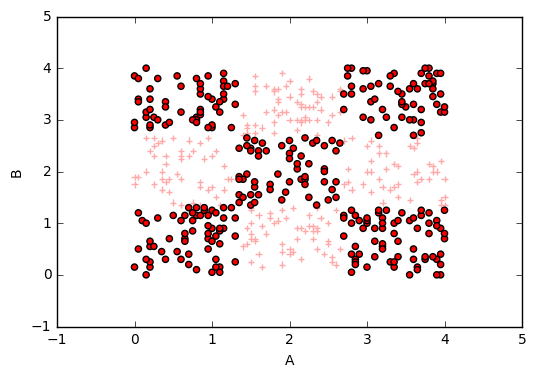

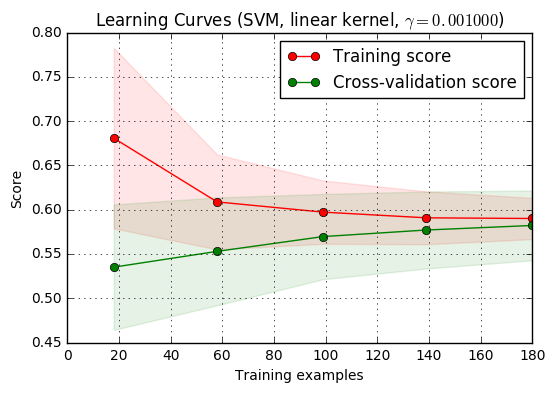

In [74]:
plt.show()

In [49]:
h=1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [55]:
 from sklearn.model_selection import StratifiedKFold

In [274]:
Z = Z.reshape(xx.shape)

In [275]:
#plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3,levels=np.linspace(0, 1, xx.shape[0]))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)

In [276]:
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())

(0.0, 4.0)

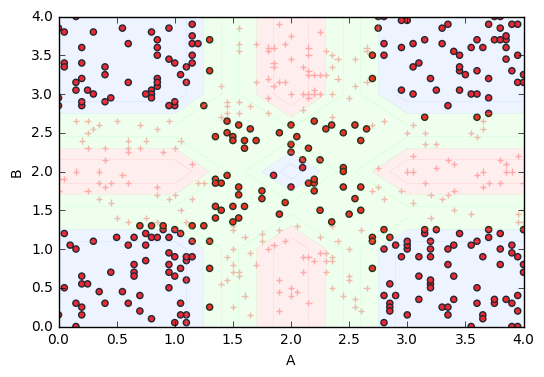

In [277]:
plt.show()

In [30]:
np.logspace(-6, -1, 10), 1/np.logspace(-6, -1, 10)

(array([  1.00000000e-06,   3.59381366e-06,   1.29154967e-05,
          4.64158883e-05,   1.66810054e-04,   5.99484250e-04,
          2.15443469e-03,   7.74263683e-03,   2.78255940e-02,
          1.00000000e-01]),
 array([  1.00000000e+06,   2.78255940e+05,   7.74263683e+04,
          2.15443469e+04,   5.99484250e+03,   1.66810054e+03,
          4.64158883e+02,   1.29154967e+02,   3.59381366e+01,
          1.00000000e+01]))